## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
x_train.shape

(25000, 10000)

In [4]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
x_train.shape

(25000, 10000)

In [6]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
print(type(x_val), type(y_val))
print(x_val.shape, y_val.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 10000) (10000,)


In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 6s 55ms/step - loss: 0.5706 - accuracy: 0.7324 - val_loss: 0.4642 - val_accuracy: 0.8319
Epoch 2/5
30/30 [==============================] - 1s 21ms/step - loss: 0.3648 - accuracy: 0.8933 - val_loss: 0.3527 - val_accuracy: 0.8756
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2581 - accuracy: 0.9254 - val_loss: 0.2916 - val_accuracy: 0.8899
Epoch 4/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1997 - accuracy: 0.9385 - val_loss: 0.2780 - val_accuracy: 0.8896
Epoch 5/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1630 - accuracy: 0.9493 - val_loss: 0.2765 - val_accuracy: 0.8876


### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [12]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
]) 

In [13]:
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
print(type(x_val), type(y_val))
print(x_val.shape, y_val.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 10000) (10000,)


In [16]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 37ms/step - loss: 0.4911 - accuracy: 0.7875 - val_loss: 0.3570 - val_accuracy: 0.8740
Epoch 2/5
30/30 [==============================] - 1s 20ms/step - loss: 0.2818 - accuracy: 0.9035 - val_loss: 0.2929 - val_accuracy: 0.8893
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2058 - accuracy: 0.9303 - val_loss: 0.2911 - val_accuracy: 0.8834
Epoch 4/5
30/30 [==============================] - 1s 20ms/step - loss: 0.1586 - accuracy: 0.9488 - val_loss: 0.3137 - val_accuracy: 0.8761
Epoch 5/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1289 - accuracy: 0.9562 - val_loss: 0.3782 - val_accuracy: 0.8556


### Complete the codes for compile and model fitting. 

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

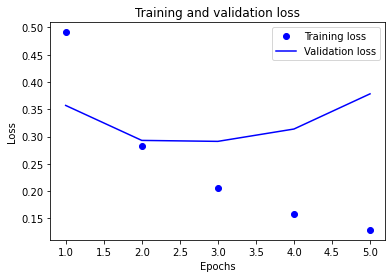

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [18]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model2_dr.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model2_dr.evaluate(x_test, y_test)

## retrain and visualize the validation loss of new model


Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5558 - accuracy: 0.7133 - val_loss: 0.3502 - val_accuracy: 0.8899
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.3981 - accuracy: 0.8342 - val_loss: 0.2505 - val_accuracy: 0.9204
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.3277 - accuracy: 0.8739 - val_loss: 0.2033 - val_accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2813 - accuracy: 0.8865


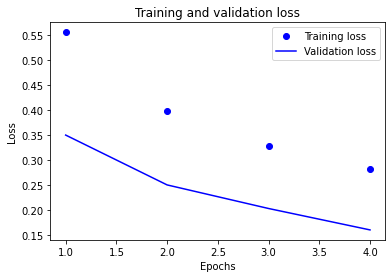

In [19]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [20]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers


model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [21]:
model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model2_dr.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model2_dr.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 36ms/step - loss: 0.4923 - accuracy: 0.8183 - val_loss: 0.3131 - val_accuracy: 0.9174
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2982 - accuracy: 0.9103 - val_loss: 0.2295 - val_accuracy: 0.9385
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2358 - accuracy: 0.9317 - val_loss: 0.2004 - val_accuracy: 0.9474
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3519 - accuracy: 0.8794


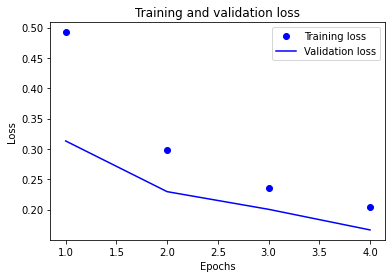

In [22]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


L1 regularization model shows decreased training loss in comparison to the dropout model. The validation loss aligns accordingly in the graph.